In [2]:
import json
import numpy as np

### Geração das curvas train_loss, val_loss e f1

### Curva F1 Score

In [3]:
helbert_6 = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Codigos/FineTuning/Indicios/HelBERT-uncased-fs-6_f1_curve.json'))
bertimbau = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Codigos/FineTuning/Indicios/BERTimbau_f1_curve.json'))
mbert = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Codigos/FineTuning/Indicios/mBERT_f1_curve.json'))
legal_bert = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Codigos/FineTuning/Indicios/LegalBERT-pt-sc_f1_curve.json'))
juris_bert = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Codigos/FineTuning/Indicios/jurisBERT_f1_curve.json'))

In [4]:
def retorna_media_metricas(metricas, metrica):
    max_length = max(len(lista) for lista in metricas[0][metrica])
    # Lista para armazenar as médias
    medias = []
    # Calcular a média para cada índice até o comprimento máximo
    for i in range(max_length):
        valores = [lista[i] for lista in metricas[0][metrica] if i < len(lista)]
        media = np.mean(valores)
        medias.append(media)
    return medias

In [5]:
media_f1_helbert_6 = retorna_media_metricas(helbert_6, 'f1_curve')
media_f1_bertimbau = retorna_media_metricas(bertimbau, 'f1_curve')
media_f1_legal_bert = retorna_media_metricas(legal_bert, 'f1_curve')
media_f1_juris_bert = retorna_media_metricas(juris_bert, 'f1_curve')
media_f1_mbert = retorna_media_metricas(mbert, 'f1_curve')

In [6]:
f1_curves = [media_f1_helbert_6, media_f1_bertimbau, media_f1_legal_bert, media_f1_juris_bert, media_f1_mbert]
modelos = ['HelBERT-uncased-fs-6', 'BERTimbau', 'LegalBERT-pt-sc', 'JurisBERT', 'mBERT']

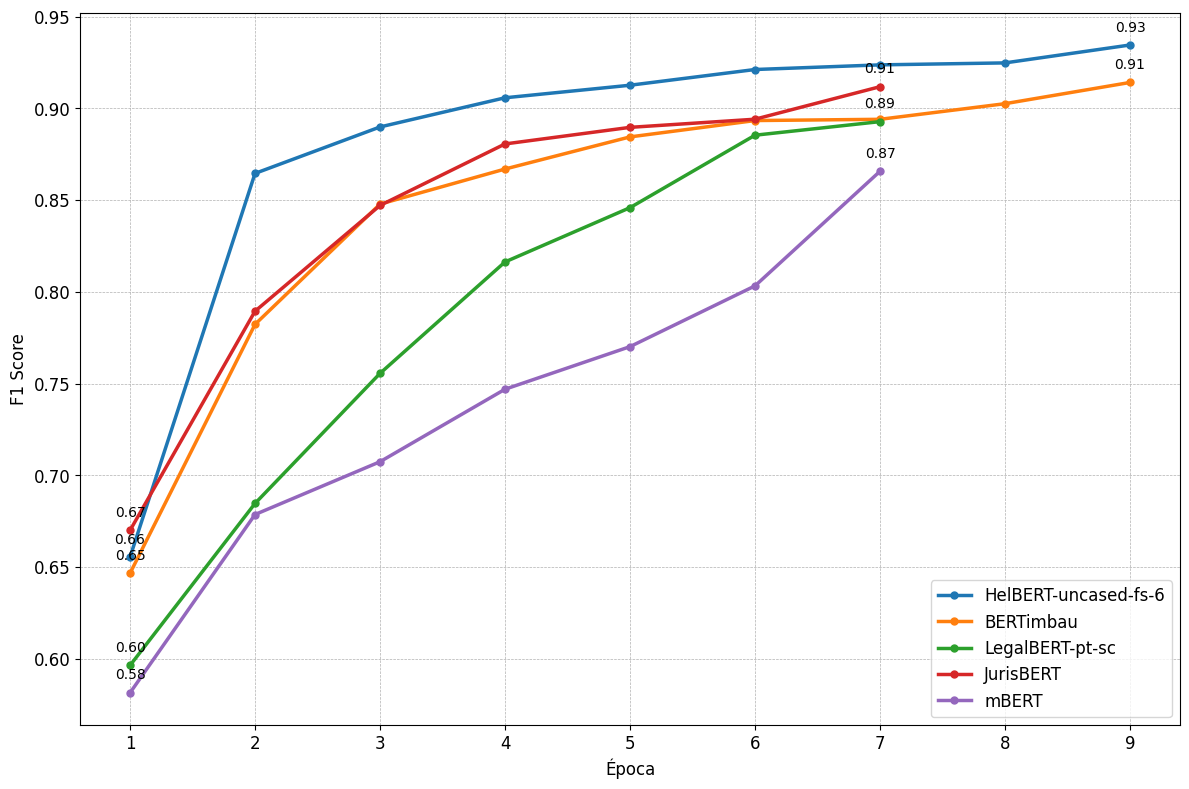

In [7]:
import matplotlib.pyplot as plt

# Plotando o gráfico
plt.figure(figsize=(12, 8))

# Plotando cada curva de F1 Score
for i, f1_curve in enumerate(f1_curves):
    epochs = range(1, len(f1_curve) + 1)
    plt.plot(epochs, f1_curve, label=f'{modelos[i]}', linestyle='-', marker='o', markersize=5, linewidth=2.5)
    
    # Adicionando os valores nas linhas
    for j, value in enumerate(f1_curve):
        if j == 0 or j == len(f1_curve) - 1:
            plt.annotate(f'{value:.2f}', (epochs[j], f1_curve[j]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

# Títulos e rótulos
plt.xlabel('Época', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)

# Adicionando grade
plt.grid(True, linestyle='--', linewidth=0.5)

# Adicionando legenda
plt.legend(fontsize=12)

# Melhorando a legibilidade dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.savefig('f1_score_indicios_congelados.svg')
# Exibindo o gráfico
plt.show()


### Curva Val_loss

In [8]:
media_val_loss_helbert_6 = retorna_media_metricas(helbert_6, 'val_loss_curve')
media_val_loss_bertimbau = retorna_media_metricas(bertimbau, 'val_loss_curve')
media_val_loss_legal_bert = retorna_media_metricas(legal_bert, 'val_loss_curve')
media_val_loss_juris_bert = retorna_media_metricas(juris_bert, 'val_loss_curve')
media_val_loss_mbert = retorna_media_metricas(mbert, 'val_loss_curve')

In [9]:
val_loss_curves = [media_val_loss_helbert_6, media_val_loss_bertimbau, media_val_loss_legal_bert, media_val_loss_juris_bert, media_val_loss_mbert]
modelos = ['HelBERT-uncased-fs-6', 'BERTimbau', 'LegalBERT-pt-sc', 'JurisBERT', 'mBERT']

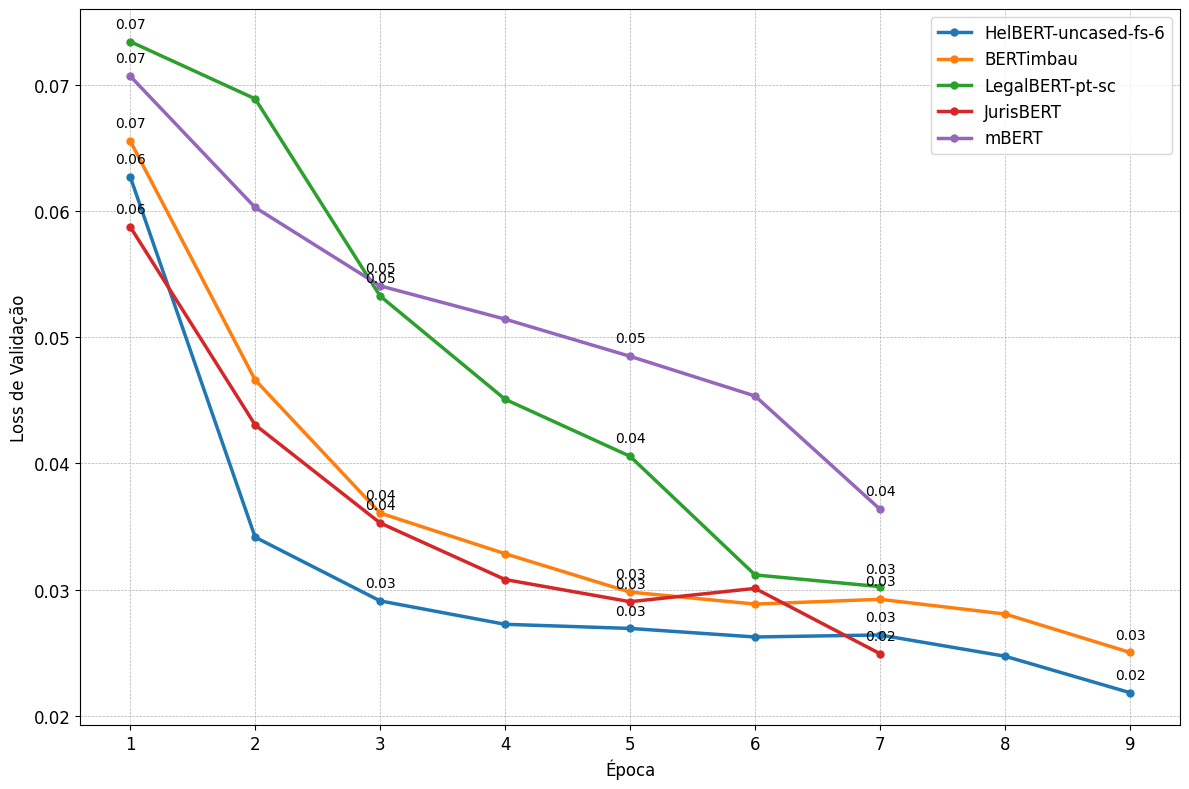

In [10]:
import matplotlib.pyplot as plt

# Plotando o gráfico
plt.figure(figsize=(12, 8))

# Plotando cada curva de F1 Score
for i, val_loss in enumerate(val_loss_curves):
    epochs = range(1, len(val_loss) + 1)
    plt.plot(epochs, val_loss, label=f'{modelos[i]}', linestyle='-', marker='o', markersize=5, linewidth=2.5)
    
    # Adicionando os valores nas linhas
    for j, value in enumerate(val_loss):
        if j == 0 or j == len(val_loss) - 1 or j % 2 == 0:
            plt.annotate(f'{value:.2f}', (epochs[j], val_loss[j]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

# Títulos e rótulos
plt.xlabel('Época', fontsize=12)
plt.ylabel('Loss de Validação', fontsize=12)

# Adicionando grade
plt.grid(True, linestyle='--', linewidth=0.5)

# Adicionando legenda
plt.legend(fontsize=12)

# Melhorando a legibilidade dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.savefig('val_loss_indicios_congelados.svg')
# Exibindo o gráfico
plt.show()
